In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from qutip import *

In [3]:
import plotly.graph_objects as go

In [4]:

import warnings
import itertools as it
import numpy as np
from numpy import pi, array, sin, cos, angle, log2, sqrt

try:
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    from matplotlib import cm
    from mpl_toolkits.mplot3d import Axes3D
except:
    pass

from qutip.qobj import Qobj, isket
from qutip.states import ket2dm
from qutip.wigner import wigner
from qutip.tensor import tensor
from qutip.matplotlib_utilities import complex_phase_cmap
from qutip.superoperator import vector_to_operator
from qutip.superop_reps import to_super, _super_to_superpauli, _isqubitdims, _pauli_basis
from qutip.tensor import flatten

from qutip import settings

## Parameters

In [5]:
N = 20

In [6]:
def plot_wigner2(rho, fig=None, ax=None, figsize=(6, 6),
                cmap=None, alpha_max=7.5, colorbar=False,
                method='clenshaw', projection='2d'):
    """
    Plot the the Wigner function for a density matrix (or ket) that describes
    an oscillator mode.
    Parameters
    ----------
    rho : :class:`qutip.qobj.Qobj`
        The density matrix (or ket) of the state to visualize.
    fig : a matplotlib Figure instance
        The Figure canvas in which the plot will be drawn.
    ax : a matplotlib axes instance
        The axes context in which the plot will be drawn.
    figsize : (width, height)
        The size of the matplotlib figure (in inches) if it is to be created
        (that is, if no 'fig' and 'ax' arguments are passed).
    cmap : a matplotlib cmap instance
        The colormap.
    alpha_max : float
        The span of the x and y coordinates (both [-alpha_max, alpha_max]).
    colorbar : bool
        Whether (True) or not (False) a colorbar should be attached to the
        Wigner function graph.
    method : string {'clenshaw', 'iterative', 'laguerre', 'fft'}
        The method used for calculating the wigner function. See the
        documentation for qutip.wigner for details.
    projection: string {'2d', '3d'}
        Specify whether the Wigner function is to be plotted as a
        contour graph ('2d') or surface plot ('3d').
    Returns
    -------
    fig, ax : tuple
        A tuple of the matplotlib figure and axes instances used to produce
        the figure.
    """

    if not fig and not ax:
        if projection == '2d':
            fig, ax = plt.subplots(1, 1, figsize=figsize)
        elif projection == '3d':
            fig = plt.figure(figsize=figsize)
            ax = fig.add_subplot(1, 1, 1, projection='3d')
        else:
            raise ValueError('Unexpected value of projection keyword argument')

    if isket(rho):
        rho = ket2dm(rho)

    xvec = np.linspace(-alpha_max, alpha_max, 200)
    W0 = wigner(rho, xvec, xvec, method=method)

    W, yvec = W0 if type(W0) is tuple else (W0, xvec)

    wlim = abs(W).max()

    if cmap is None:
        cmap = cm.get_cmap('RdBu')

        
    if projection == '2d':        
#        cf = ax.contourf(xvec, yvec, W, 100,
#                         norm=mpl.colors.Normalize(-wlim, wlim), cmap=cmap)

#        cf = go.Figure(xvec, yvec, W)
        cf = go.Figure(data=
                        go.Heatmap(
                        z=W, connectgaps=True, zsmooth='best'))
        cf.show()

    elif projection == '3d':
        X, Y = np.meshgrid(xvec, xvec)
        cf = ax.plot_surface(X, Y, W0, rstride=5, cstride=5, linewidth=0.5,
                             norm=mpl.colors.Normalize(-wlim, wlim), cmap=cmap)
    else:
        raise ValueError('Unexpected value of projection keyword argument.')

#    if xvec is not yvec:
#        ax.set_ylim(xvec.min(), xvec.max())

#    ax.set_xlabel(r'$\rm{Re}(\alpha)$', fontsize=12)
#    ax.set_ylabel(r'$\rm{Im}(\alpha)$', fontsize=12)

#    if colorbar:
#       fig.colorbar(cf, ax=ax)
#
#    ax.set_title("Wigner function", fontsize=12)

    return fig, ax



In [7]:
def plot_wigner_2d_3d(psi):
    #fig, axes = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12, 6))
    fig = plt.figure(figsize=(17, 8))
    
    ax = fig.add_subplot(1, 2, 1)
    plot_wigner2(psi, fig=fig, ax=ax, alpha_max=6);
    
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    plot_wigner(psi, fig=fig, ax=ax, projection='3d', alpha_max=6);
    
    plt.close(fig)
    return fig

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11baec7c0>)

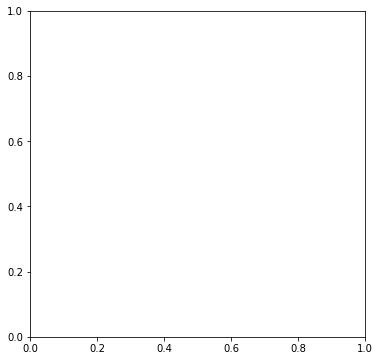

In [15]:
plot_wigner2(basis(N, 0))

## Vacuum state using itertools

In [9]:
from ipywidgets import interact

In [10]:
def plot_wigner_interact_basis(psin):
    return plot_wigner_2d_3d(basis(N, psin))

In [11]:
interact(plot_wigner_interact_basis, psin=list(range(7)))

interactive(children=(Dropdown(description='psin', options=(0, 1, 2, 3, 4, 5, 6), value=0), Output()), _dom_cl…

<function __main__.plot_wigner_interact_basis(psin)>

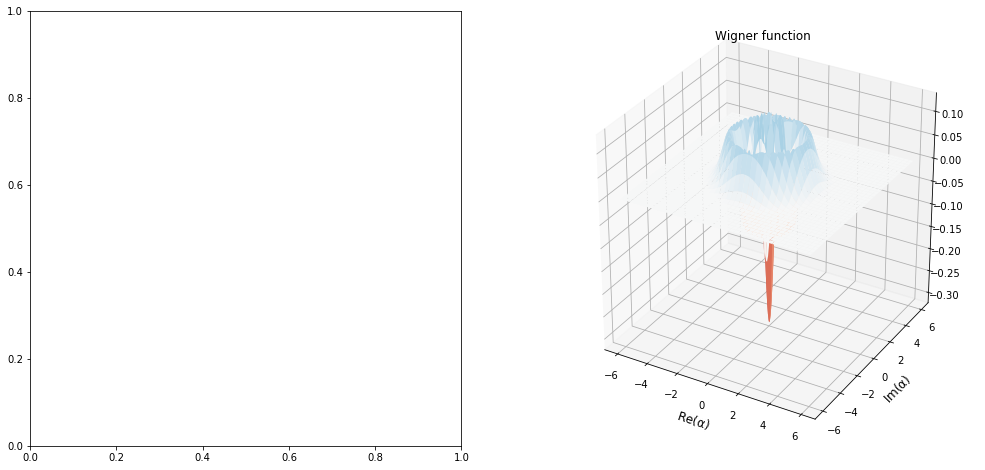

In [12]:
plot_wigner_interact_basis(3)

In [13]:
def plot_wigner3(rho, fig=None, ax=None, 
                alpha_max=7.5, 
                method='clenshaw', projection='2d'):
    xvec = np.linspace(-alpha_max, alpha_max, 200)
    W0 = wigner(rho, xvec, xvec, method=method)
    W, yvec = W0 if type(W0) is tuple else (W0, xvec)
    print("W", W)
    print('yvec', yvec)
    print("W0", W0)

In [14]:
psi = basis(N, 0)
plot_wigner3(psi)

W [[4.41286776e-50 1.35922035e-49 4.13927025e-49 ... 4.13927025e-49
  1.35922035e-49 4.41286776e-50]
 [1.35922035e-49 4.18657448e-49 1.27494878e-48 ... 1.27494878e-48
  4.18657448e-49 1.35922035e-49]
 [4.13927025e-49 1.27494878e-48 3.88263577e-48 ... 3.88263577e-48
  1.27494878e-48 4.13927025e-49]
 ...
 [4.13927025e-49 1.27494878e-48 3.88263577e-48 ... 3.88263577e-48
  1.27494878e-48 4.13927025e-49]
 [1.35922035e-49 4.18657448e-49 1.27494878e-48 ... 1.27494878e-48
  4.18657448e-49 1.35922035e-49]
 [4.41286776e-50 1.35922035e-49 4.13927025e-49 ... 4.13927025e-49
  1.35922035e-49 4.41286776e-50]]
yvec [-7.5        -7.42462312 -7.34924623 -7.27386935 -7.19849246 -7.12311558
 -7.04773869 -6.97236181 -6.89698492 -6.82160804 -6.74623116 -6.67085427
 -6.59547739 -6.5201005  -6.44472362 -6.36934673 -6.29396985 -6.21859296
 -6.14321608 -6.0678392  -5.99246231 -5.91708543 -5.84170854 -5.76633166
 -5.69095477 -5.61557789 -5.54020101 -5.46482412 -5.38944724 -5.31407035
 -5.23869347 -5.16331658 -5.